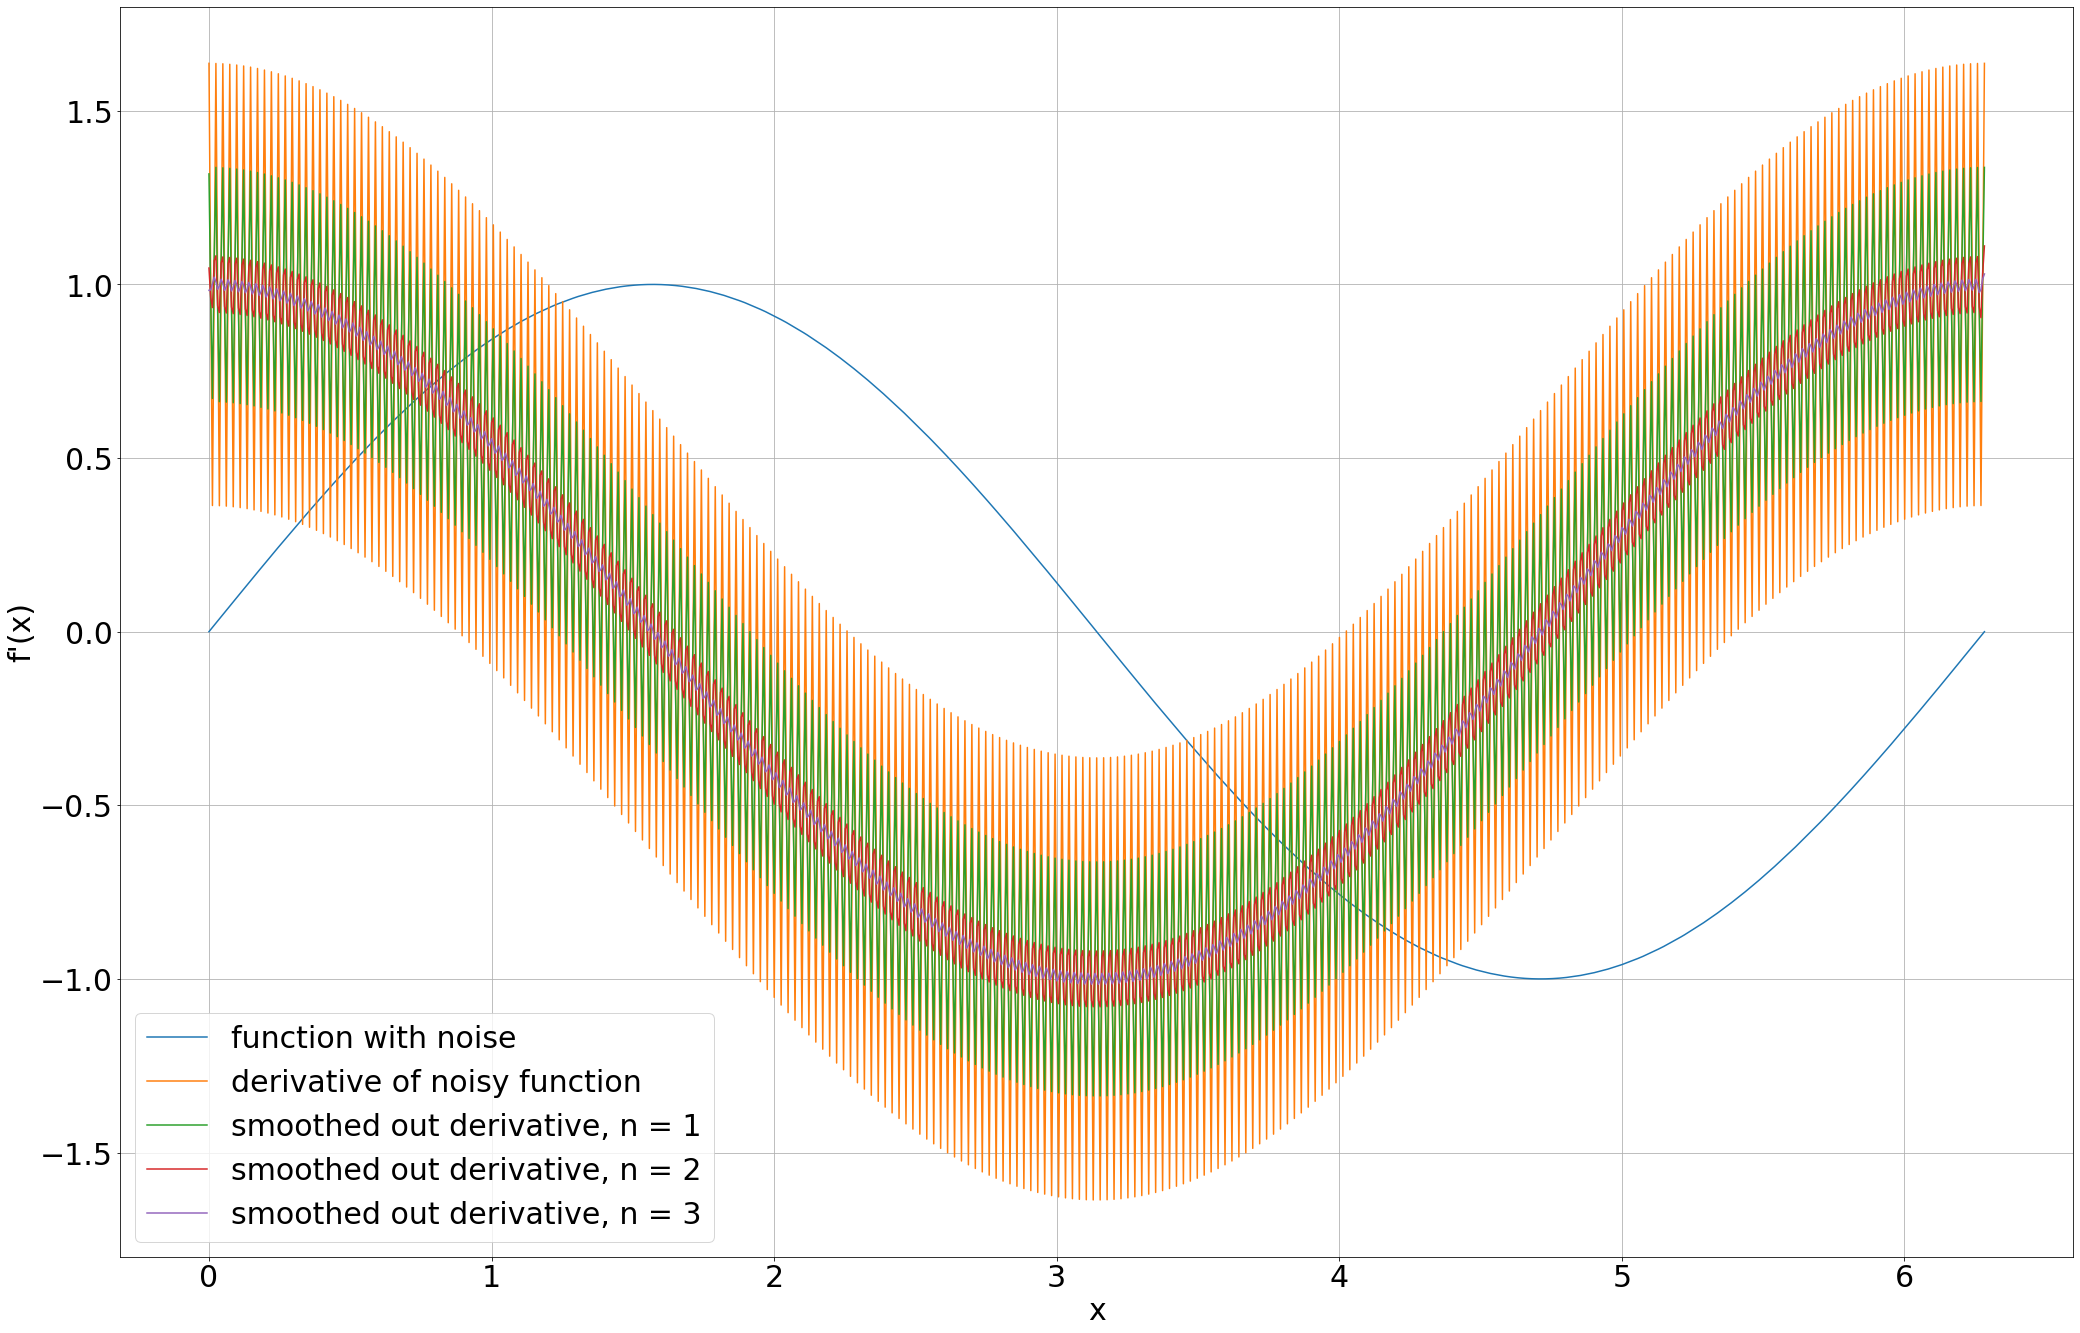

In [23]:
import numpy as np
import math
import matplotlib.pyplot as plt

n = np.linspace(0, 2*math.pi, num=1025)
der = []
der_n = []
der_f1 = []
der_f2 = []
der_f3 = []
h = (2*math.pi)/1024
f = []
f_n = []
g = []

for i in range(1025):
    f.append(math.sin(n[i]))
    
for i in range(1025):
    f_n.append(math.sin(256*n[i])/256)
    
der.append((math.sin(n[1])-math.sin(n[0]))/h)
for i in range(1,1024):
    der.append(((math.sin(n[i]+h))-(math.sin(n[i]-h)))/(2*h))
der.append((math.sin(n[1024])-math.sin(n[1023]))/h)
    
for i in range(1025):
    g.append(f[i]+f_n[i])
    
der_n.append((g[1]-g[0])/h)
for i in range(1,1024):
    der_n.append((g[i+1]-g[i-1])/(2*h))
der_n.append((g[1024]-g[1023])/h)
    
for i in range(1,1024):
    g[i] = 0.25*g[i-1]+0.5*g[i]+0.25*g[i+1]

der_f1.append((g[1]-g[0])/h)
for i in range(1,1024):
    der_f1.append((g[i+1]-g[i-1])/(2*h))
der_f1.append((g[1024]-g[1023])/h)

for j in range(2):
    for i in range(1,1024):
        g[i] = 0.25*g[i-1]+0.5*g[i]+0.25*g[i+1]

der_f2.append((g[1]-g[0])/h)
for i in range(1,1024):
    der_f2.append((g[i+1]-g[i-1])/(2*h))
der_f2.append((g[1024]-g[1023])/h)

for j in range(3):
    for i in range(1,1024):
        g[i] = 0.25*g[i-1]+0.5*g[i]+0.25*g[i+1]

der_f3.append((g[1]-g[0])/h)
for i in range(1,1024):
    der_f3.append((g[i+1]-g[i-1])/(2*h))
der_f3.append((g[1024]-g[1023])/h)

fig, ax = plt.subplots(figsize = (35, 23))
plt.rcParams['font.size'] = 30
#plt.plot(n, f, label = "original function")
#plt.plot(n, f_n, label = "noise")
plt.plot(n, g, label = "function with noise")
plt.plot(n, der_n, label = "derivative of noisy function")
plt.plot(n, der_f1, label = "smoothed out derivative, n = 1")
plt.plot(n, der_f2, label = "smoothed out derivative, n = 2")
plt.plot(n, der_f3, label = "smoothed out derivative, n = 3")
#plt.plot(n, der, label = "derivative of original function")
plt.legend()
#txt="Fig. 1(b): The graph depicts that the derivative of a function with high-frequency but low amplitude noise spreads out and\nosscilates at high frequency over its actual derivative, had the noise was not present. This can be reduced by modifing\nthe noisy function by changing each of its element with a weighted average of that element and its neighbouring ones."
#plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center')
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.grid()
plt.savefig('1(b)')
plt.show()